# 1.2 Electron Transport in molec. dingenskirchens

In [16]:
import numpy as np
import matplotlib.pyplot as plt

### Unterpunkt b: Implementing Gauss Seidel & Testing
Also basically wird mit dem Gauss Seidel Algorythmus ein Gleichungssystem der Form Ax=b für x gelöst, wobei A die zufäll

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(100, 100)
(100,)


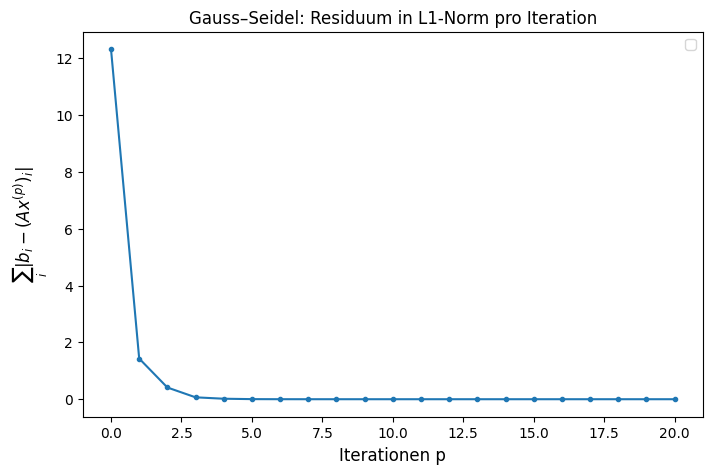

In [17]:
# Erstellen einer zufälligen 100x100 Matrix A und Vektor b, die dem Gauss Seidel Verfahren genügen
# strikte Diagonale Dominanz der Matrix, was die Konvergenz garantiert
n = 100
X = np.random.rand(n, n)
A= X@X.T 
np.fill_diagonal(A, np.sum(np.abs(A), axis=1) + 1)  # Diagonalelemente ersetezn durch Summe der Zeilen plus 1 (strikte Diagonale Dominanz)
b = np.random.rand(n)


print(np.shape(A))
print(np.shape(b)) 

# Definiere Gauss-Seidel-Verfahrens
def gauss_seidl(A, b, max_iters=20, tol=1e-10): # max_iters: maximale Anzahl an Iterationen, tol: Toleranz für Abbruch (um Endlosschleifen zu vermeiden)
    n = b.size
    x = np.zeros_like(b, dtype=complex) # Anfangslösung x^(0) = 0 vektor

    errs = [] # Liste zur Speicherung der Fehlerwerte pro Iteration, anfangs leer
    for _ in range(max_iters): # Diese Schleife ersetzt immer en ganzen Vektor x^(p) durch x^(p+1)
        x_old = x.copy()
        for i in range(n): # Diese Schleife berechnet die i-te Komponente von x^(p+1) 
            s1 = A[i, :i] @ x[:i]          # Summe über neue Werte j<i (Berechnet mit Skalarprodukt weil SP eine Summe ist)
            s2 = A[i, i+1:] @ x_old[i+1:]  # Summe über alte Werte j>i
            x[i] = (b[i] - s1 - s2) / A[i, i] # Update der i-ten Komponente von x

        r = b - A @ x # Residuum r = b - A x^(p)
        err = np.sum(np.abs(r))     # geforderte Größe: Summe |b - A x^(p)| als Einzelwert
        errs.append(err) # Fehlerwert zur Liste der Fehlerwerte errs hinzufügen
        if err < tol: # wenn Fehler kleiner als Toleranz, Abbruch
            break
    return x, np.array(errs)

x, errs = gauss_seidl(A, b, max_iters=1000, tol=1e-12)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(errs, marker='o', linestyle='-', markersize=3)
#plt.yscale('log')  # Logarithmische Skalierung der y-Achse wie in Angabe empfohlen
plt.xlabel('Iterationen p', fontsize=12)
plt.ylabel(r'$\sum_i |b_i - (A x^{(p)})_i|$', fontsize=12)
plt.title('Gauss–Seidel: Residuum in L1-Norm pro Iteration')
plt.legend()
plt.show()

### Unterpunkt c: Ringfunktion

In [18]:
def ring(N, t, E, delta, alpha, beta):
    
    HR = np.zeros((N, N), dtype=float)
    for i in range(N-1):
        HR[i, i+1] = t # Matrix einträge ij sind t für benachbarte i,j (1,2), (2,3), ... (6,1)
        HR[i+1, i] = t # auch (2,1), (3,2), ... (1,6) sind t
    HR[0, N-1] = t   # 1 ist mit N verbunden
    HR[N-1, 0] = t

    # Delta matrix ist delta an alpha, beta positionen, sonst 0
    Delta = np.zeros((N, N), dtype=float)
    Delta[alpha-1, alpha-1] = delta #-1 weil python 0-indexiert und physikalisch 1-indexiert
    Delta[beta-1,  beta-1]  = delta

    # A(E) = HR - E I + i Delta
    A = HR - E*np.eye(N) + 1j*Delta # np.eye(N) ist Einheitsmatrix NxN
    return A

A1 = ring(N=6, t=-2.6, E=3, delta=0.5, alpha=1, beta=3) #E=3 Testwert
A2 = ring(N=6, t=-2.6, E=3, delta=0.5, alpha=1, beta=4)

print(A1)
print(A2)

# Hilfsfunktion um nur den Ring-Hamiltonian zu erzeugen
def Hr(N, t):
    
    HR = np.zeros((N, N), dtype=float)
    for i in range(N-1):
        HR[i, i+1] = t # Matrix einträge ij sind t für benachbarte i,j (1,2), (2,3), ... (6,1)
        HR[i+1, i] = t # auch (2,1), (3,2), ... (1,6) sind t
    HR[0, N-1] = t   # 1 ist mit N verbunden
    HR[N-1, 0] = t
    return HR

HR = Hr(N=6, t=-2.6)
print("HR:", HR) 

[[-3. +0.5j -2.6+0.j   0. +0.j   0. +0.j   0. +0.j  -2.6+0.j ]
 [-2.6+0.j  -3. +0.j  -2.6+0.j   0. +0.j   0. +0.j   0. +0.j ]
 [ 0. +0.j  -2.6+0.j  -3. +0.5j -2.6+0.j   0. +0.j   0. +0.j ]
 [ 0. +0.j   0. +0.j  -2.6+0.j  -3. +0.j  -2.6+0.j   0. +0.j ]
 [ 0. +0.j   0. +0.j   0. +0.j  -2.6+0.j  -3. +0.j  -2.6+0.j ]
 [-2.6+0.j   0. +0.j   0. +0.j   0. +0.j  -2.6+0.j  -3. +0.j ]]
[[-3. +0.5j -2.6+0.j   0. +0.j   0. +0.j   0. +0.j  -2.6+0.j ]
 [-2.6+0.j  -3. +0.j  -2.6+0.j   0. +0.j   0. +0.j   0. +0.j ]
 [ 0. +0.j  -2.6+0.j  -3. +0.j  -2.6+0.j   0. +0.j   0. +0.j ]
 [ 0. +0.j   0. +0.j  -2.6+0.j  -3. +0.5j -2.6+0.j   0. +0.j ]
 [ 0. +0.j   0. +0.j   0. +0.j  -2.6+0.j  -3. +0.j  -2.6+0.j ]
 [-2.6+0.j   0. +0.j   0. +0.j   0. +0.j  -2.6+0.j  -3. +0.j ]]
HR: [[ 0.  -2.6  0.   0.   0.  -2.6]
 [-2.6  0.  -2.6  0.   0.   0. ]
 [ 0.  -2.6  0.  -2.6  0.   0. ]
 [ 0.   0.  -2.6  0.  -2.6  0. ]
 [ 0.   0.   0.  -2.6  0.  -2.6]
 [-2.6  0.   0.   0.  -2.6  0. ]]


### Unterpunkt d und e: k Shift für Diagonale Dominanz und Konvergenz von Gauss Seidl, berechnung von G

In [19]:
N, t, E, delta, alpha1, beta1, alpha2, beta2 = 6, -2.6, 3.0, 0.5, 1, 3, 1, 4
#diese Lösung für e lößt nur für einen Wert für E (hier 3). Die Lösung über den Intervall erfolgt in f
I = np.eye(N, dtype=np.complex128)
k = 6*1j 
Ak1 = A1 + k * np.eye(N, dtype=np.complex128)
Ak2 = A2 + k * np.eye(N, dtype=np.complex128)

def greens_function(Ak, N, k, I):
    G = np.zeros((N, N), dtype=np.complex128)
    for _ in range(200):  # äußere Schleife für berechnung nueer G
        RHS= I + k * G    # RHS right hand side rechte seite der Gelichung
        G_new = np.zeros_like(G)
        for j in range(N):
            G_new[:, j] = gauss_seidl(Ak, RHS[:, j], max_iters=1000, tol=1e-12)[0] # Gauss Seidl auf jede Spalte von RHS anwenden
        G = G_new
    return G

G1 = greens_function(Ak1, N=6, k=k, I=I)
G2 = greens_function(Ak2, N=6, k=k, I=I)


# Ausgabe der Ergebnisse für E=3 um zu prüfen ob die greens_function richtig funktioniert
print("Green's function G:", G1) 
print("Green's function G2:", G2)
print("G1(alpha,alpha:)", G1[alpha1-1, alpha1-1])
print("G1(beta,beta:)", G1[beta1-1, beta1-1])
print("G1(alpha,beta:)", G1[alpha1-1, beta1-1])
print("G1(beta,alpha:)", G1[beta1-1, alpha1-1])
print("G2(alpha,alpha:)", G2[alpha2-1, alpha2-1])
print("G2(beta,beta:)", G2[beta2-1, beta2-1])
print("G2(alpha,beta:)", G2[alpha2-1, beta2-1])
print("G2(beta,alpha:)", G2[beta2-1, alpha2-1])






Green's function G: [[-0.61740229-0.3397918j   0.26703899+0.05360643j  0.3070575 +0.27938674j
  -0.67394428-0.31760681j  0.47178188+0.0864958j   0.12722872+0.21903203j]
 [ 0.26703899+0.05360643j -0.7924356 -0.0955472j   0.26703899+0.05360643j
   0.47178188+0.0864958j  -0.81375456-0.15218121j  0.47178188+0.0864958j ]
 [ 0.3070575 +0.27938674j  0.26703899+0.05360643j -0.61740229-0.3397918j
   0.12722872+0.21903203j  0.47178188+0.0864958j  -0.67394428-0.31760681j]
 [-0.67394428-0.31760681j  0.47178188+0.0864958j   0.12722872+0.21903203j
  -0.65952384-0.31532474j  0.25040519+0.14433371j  0.36813573+0.14978207j]
 [ 0.47178188+0.0864958j  -0.81375456-0.15218121j  0.47178188+0.0864958j
   0.25040519+0.14433371j -0.76316998-0.25203846j  0.25040519+0.14433371j]
 [ 0.12722872+0.21903203j  0.47178188+0.0864958j  -0.67394428-0.31760681j
   0.36813573+0.14978207j  0.25040519+0.14433371j -0.65952384-0.31532474j]]
Green's function G2: [[-0.47756888-0.42180139j  0.12377147+0.19742668j  0.33475483+0.19

### Unterpunkt f: mit Intervall E[-6,6]

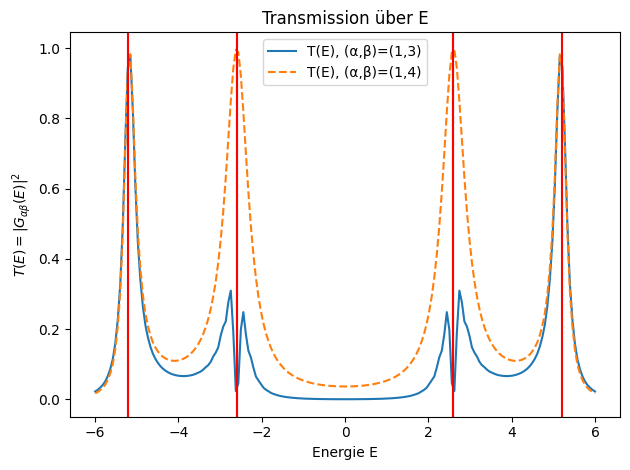

In [20]:
Es = np.linspace(-6.0, 6.0, 200)
# greens function über E Intervall [-6,6]
def sweep_over_E(N, t, delta, alpha, beta, k): #diese Funktuon nimmt alle paramater und berechnet die Ak Matrizen neu, weil alpha und beta sowieso angegeben werden müssen
    I = np.eye(N, dtype=np.complex128)
    Gaa, Gbb, Gab, Gba = [], [], [], []
    for E in Es:
        A0  = ring(N, t, E, delta, alpha, beta)             
        Ak  = A0 + k * np.eye(N, dtype=np.complex128)   # Shift Azfgabe d
        G   = greens_function(Ak, N=N, k=k, I=I)        # Green aus e für nur ein Es
        a, b = alpha-1, beta-1                          # alpha und beta werden hier gebraucht, deswegen kompletteingabe und neuberechnen der Ak
        Gaa.append(G[a, a])
        Gbb.append(G[b, b])
        Gab.append(G[a, b])
        Gba.append(G[b, a])
    return np.array(Gaa), np.array(Gbb), np.array(Gab), np.array(Gba)

Gaa_13, Gbb_13, Gab_13, Gba_13 = sweep_over_E(N, t, delta, alpha1, beta1, k)
Gaa_14, Gbb_14, Gab_14, Gba_14 = sweep_over_E(N, t, delta, alpha2, beta2, k)

#Transmission mit Betragsquadrat
T_13 = np.abs(Gab_13)**2
T_14 = np.abs(Gab_14)**2

# Plot der Transmission über E
plt.figure()
plt.plot(Es, T_13, label="T(E), (α,β)=(1,3)")
plt.plot(Es, T_14, label="T(E), (α,β)=(1,4)", linestyle='--')
for evals in np.linalg.eigvalsh(HR): # plot der eigenwerte, np.linalg.eigvalsh gibt array aus, deswegen for schleife
    plt.axvline(evals, color='red')
plt.xlabel("Energie E")
plt.ylabel(r"$T(E)=|G_{\alpha\beta}(E)|^2$")
plt.title("Transmission über E")
plt.legend()
plt.tight_layout()
plt.show()

